# Общие данные

Импорт и чтение файла

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv('sale_tasks_dataset.csv')

Вывод  датасета

In [147]:
df.head()

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,state_talk_time_sec,wo_hit_status_result_desc,wo_hit_status_reason_desc,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd
0,422206773,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.0,"Дозвон, Отказ",Перезвонит самостоятельно позднее,142052.0,30,W,NaN,1,NaN,NaN
1,348648289,44.0,M,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,151.0,"Дозвон, Отказ",Другое,7004.0,36,W,NaN,2,RUS,NaN
2,345496995,23.0,F,town,0.0,0.0,1.0,0.0,1.0,0.0,...,68.0,"Дозвон, Успешно",Назначена встреча,80760.0,52,W,NaN,6,NaN,NaN
3,182783192,34.0,M,town,0.0,0.0,0.0,0.0,0.0,0.0,...,738.0,"Дозвон, Успешно",Обещал утилизироваться самостоятельно,158672.0,22,NaN,NaN,8,NaN,NaN
4,138498254,30.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.0,"Дозвон, Отказ",Переведен в банк,14462.0,51,W,NaN,7,NaN,NaN


Размер df

Тип данных (надо иметь ввиду при расчетах)

In [148]:
df.dtypes

customer_id                     int64
age                            object
gender_cd                      object
region_size                    object
foreign_flg                   float64
entrepreneur_flg              float64
auto_flg                      float64
traveler_flg                  float64
partnership_flg               float64
child_amt                     float64
realty_type                    object
segment_cd                     object
bundle_nm                      object
confirmed_income              float64
predicted_income              float64
product_cd                     object
functional_cd                  object
finish_dttm                    object
state_talk_time_sec           float64
wo_hit_status_result_desc      object
wo_hit_status_reason_desc      object
employee_id                   float64
emp_age                         int64
emp_gender_cd                  object
emp_children_cnt              float64
emp_work_months_cnt             int64
emp_citizens

Количеество пропусков (NULL)

In [149]:
df.isna().sum()

customer_id                       0
age                             182
gender_cd                       258
region_size                    7289
foreign_flg                    7289
entrepreneur_flg               7289
auto_flg                       7289
traveler_flg                   7289
partnership_flg                7289
child_amt                      7289
realty_type                    7289
segment_cd                     7289
bundle_nm                     13988
confirmed_income              17284
predicted_income              14604
product_cd                        0
functional_cd                     0
finish_dttm                       0
state_talk_time_sec             148
wo_hit_status_result_desc         0
wo_hit_status_reason_desc         0
employee_id                       0
emp_age                           0
emp_gender_cd                  2180
emp_children_cnt              18605
emp_work_months_cnt               0
emp_citizenship_country_cd    12487
emp_marital_status_cd       

В среднем 80% пропусков в данных указанных ниже. При анализе учитывать нецелесообразно. 
- bundle_nm, 
- confirmed_income,
- predicted_income, 
- emp_children_cnt, 
- emp_citizenship_country_cd, 
- emp_marital_status_cd 
В целом, интересно, насколько хорошая база для звонков - учитывая отсутствие инфо о предполагаемом доходе у клиентов.

In [150]:
df.shape

(18691, 28)

Кол-во дубликатов

In [151]:
df.duplicated().sum()

0

Кол-во уникалльных customer_id

In [152]:
df.customer_id.nunique()

17267

7% клиентам звонки повторялись. Можно выяснить причину повторных звонков.

# 2. Длительность разговора

#### Посмотрим на среднее время диалога, так как по этому показателю можно провести более глубокий анализ.   
- Например, понять, насколько долго клиенты готовы прослушать предложение (сразу отказываются от предложения или же прослушивают дольше, значит заинтересованность в продукте может быть выше) 
- Есть ли зависимость длительности диалога от опыт работы сотрудника и как следствие результат звонка.

In [153]:
#инфо по длительности звонков (в сек)
df.state_talk_time_sec.describe()

count    18543.000000
mean        86.350105
std        127.011570
min          0.000000
25%         24.000000
50%         46.000000
75%         99.000000
max       2671.000000
Name: state_talk_time_sec, dtype: float64

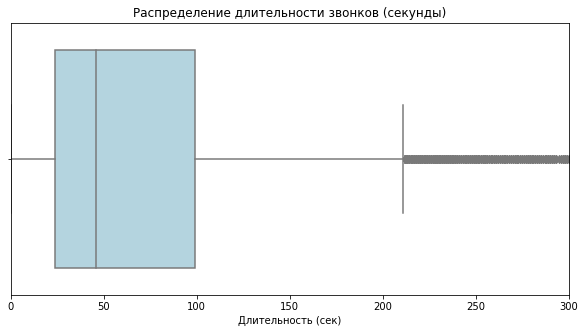

In [154]:
#визуализация
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['state_talk_time_sec'], orient='h', color='lightblue')
plt.title("Распределение длительности звонков (секунды)")
plt.xlabel("Длительность (сек)")
plt.xlim(0, 300)  # Ограничиваем диапазон для наглядности 5 минут
plt.show()

###### Создадим категории длительности звонков:  
   - если до 24 сек - short (то есть короткие звонки),  
   - от 25 до 100 - normal,  
   - от 100 до 210 - long,
   - свыше - big  (очень длительные звонки)

In [155]:
df['category_duration_call'] = df['state_talk_time_sec'].apply(lambda x: 'short' if x <= 24 
                                                                   else ('normal' if x <= 100
                                                                   else ('long' if x <= 210 
                                                                     else 'big' )))

call = df.groupby('category_duration_call').state_talk_time_sec.count().reset_index()
call['rev'] = (call.state_talk_time_sec / call.state_talk_time_sec.sum() * 100).round(1)
call

,category_duration_call,state_talk_time_sec,rev
0,big,1582,8.5
1,long,2954,15.9
2,normal,9233,49.8
3,short,4774,25.7


**Выводы**  
Медина распределения звонков - 46 сек.  
Есть большие выбросы.

Категории длительности звонков:
   1. Short – короткие < 25 сек     25.7%
   2. Normal - от 25 до 100 сек.   49.8%
   3. Long - от 100 до 210 сек.      15.9%
   4. Big - > 210 сек.                    8.5%

**Что будет дальше?**

1. Нужны описания результатов звонков. Какая доля звонков завершается успехом/неуспехом по каждой категории
2. Анализ выбросов. Short – четверть звонков. Сбросы звонков?
 Быстрый отказ?) big - 44 минуты - это ошибка или тяжелый случай? 


# 3. Распределение причины звонков

In [156]:
functional= df.groupby('functional_cd').agg(count=('customer_id', 'count')).sort_values(by='count') 
functional['per'] = (functional['count'] /functional['count'].sum() *100 ).round(2)

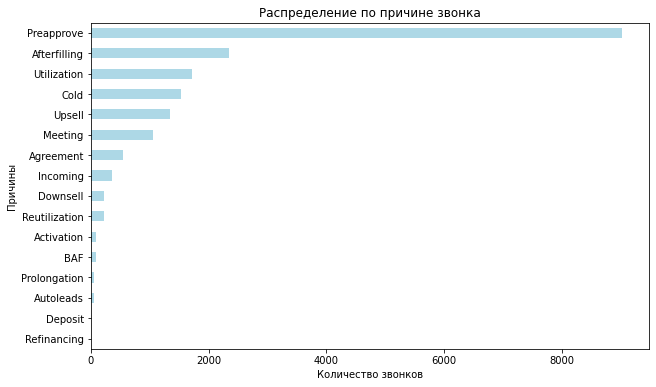

In [157]:
functional['count'].plot(kind='barh', stacked=True, figsize=(10, 6), color='lightblue')
plt.title('Распределение по причине звонка')
plt.xlabel('Количество звонков')
plt.ylabel('Причины')
plt.show()

**Выводы**

Preapprove (48%) – сотрудники находятся в разговоре с клиентом.   
Afterfilling (13%) - сотрудник звонит, уже допилить заявку, внести инфо по анкете  
Utilization (9%) - «непродуктивное" состояние   
Cold (8%) - холодная продажа   
Upsell — (7%) продажа более дорого и тяжёлого продукта.  

**Что будет дальше?**

- Насколько эффективны эти звонки в топ-3. Чем завершается?  
- Дозаполнение - как много времени уходит на такую процедуру + комментарии с описанием результата звонка.   
- Утилизация – корректно ли указывают статус звонка, какие комментарии оставляют?  

# 4. Результат звонков

In [162]:
success_call = df['wo_hit_status_result_desc'].value_counts().reset_index()
success_call.columns = ['result', 'count'] 
success_call['percentage'] = (success_call['count'] / success_call['count'].sum()) * 100
success_call


,result,count,percentage
0,"Дозвон, Отказ",16274,87.068643
1,"Дозвон, Успешно",2417,12.931357


Text(0, 0.5, 'Доля звонков (%)')

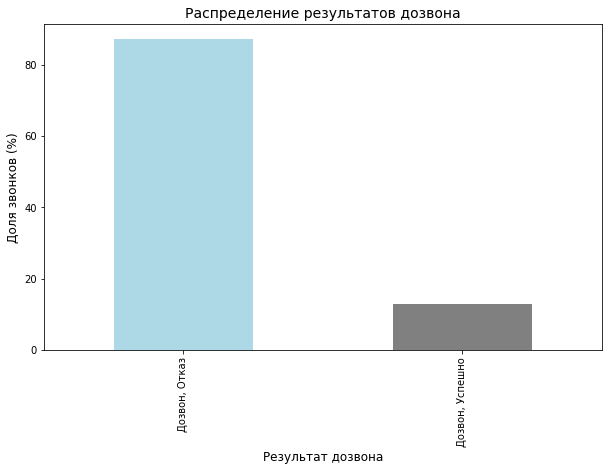

In [163]:
success_call.plot(
    x='result',          
    y='percentage',      
    kind='bar',          
    figsize=(10, 6),     
    color=['lightblue', 'grey'],  # Цвета столбцов (красный для отказа, зеленый для успеха)
    legend=False        
)

# Добавляем подписи
plt.title('Распределение результатов дозвона', fontsize=14)
plt.xlabel('Результат дозвона', fontsize=12)
plt.ylabel('Доля звонков (%)', fontsize=12)

In [164]:
reason_call = df['wo_hit_status_reason_desc'].value_counts().reset_index()
reason_call.columns = ['reason', 'count']  # Переименование столбцов
reason_call['percentage'] = (reason_call['count'] / reason_call['count'].sum()) * 100
reason_call = reason_call.query('count > 500').sort_values(by='count')
reason_call

,reason,count,percentage
6,Не звонить,504,2.696485
5,Третье лицо,604,3.231502
4,Назначена встреча,1282,6.858916
3,Кредит уже не нужен,1645,8.801027
2,Другое,1949,10.427478
1,Отказ прослушать предложение,2593,13.872987
0,Кредитная карта не нужна,3870,20.705152


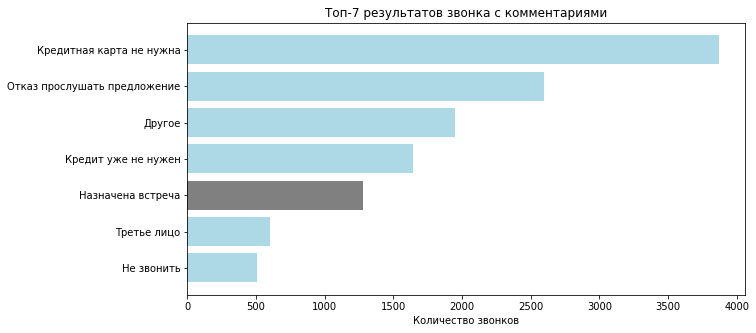

In [165]:
plt.figure(figsize=(10, 5))

# Создаем список цветов: зеленый только для "Назначена встреча", остальные - серые
colors = ['lightblue' if reason != 'Назначена встреча' else 'grey' for reason in reason_call['reason']]
plt.barh(reason_call['reason'], reason_call['count'],  color=colors)
plt.title('Топ-7 результатов звонка с комментариями')
plt.xlabel('Количество звонков')
plt.show()

**Основной вывод:**  
1. Низкая конверсия в заполнение анкеты  
  25% коротких звонков до 25 сек  
2. 87% отказов. Причины:   
 Карта/кредит не нужны  
 Нежелание взаимодействовать(прерывание звонка)      
3. Нет данных о предполагаемом доходе клиентов.  

**Вопрос для размышления:**  
Насколько текущее предложение соответствует:  
 - Финансовым возможностям целевой аудитории?  
 - Фактическому интересу к продукту?


# 5. Данные о клиентах

Возраст клиентов

In [171]:
df1.age.describe()

count    18509.000000
mean        38.033135
std         12.405885
min          8.000000
25%         29.000000
50%         37.000000
75%         46.000000
max         85.000000
Name: age, dtype: float64

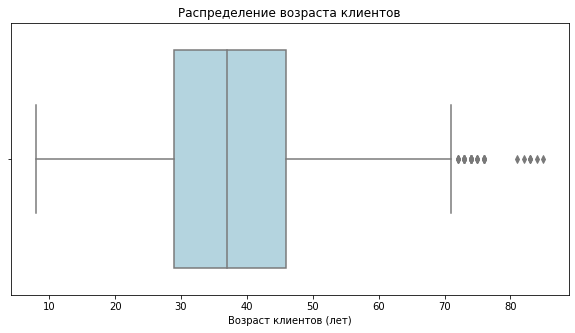

In [172]:
df1 = df.copy()
df1['age'] = (
    df['age']
    .str.replace(',', '.', regex=False) 
    .astype(float))

plt.figure(figsize=(10, 5))

sns.boxplot(x=df1['age'], orient='h', color='lightblue')

plt.title("Распределение возраста клиентов")
plt.xlabel("Возраст клиентов (лет)")
plt.show()

**Выводы** 

Основной возраст клиентов от 29 до 46 лет, с медианой – 37 лет.
Выбросы. Есть клиенты возрастом младше 18 лет и старше  70 лет.

**Что будет дальше?**

Выбросы по возрасту – Нужно выяснить, возможно, сбой/ошибка.  

Пол

In [173]:
gender = df1.groupby(['gender_cd']).agg(count=('customer_id', 'count')).sort_values(by='count') 

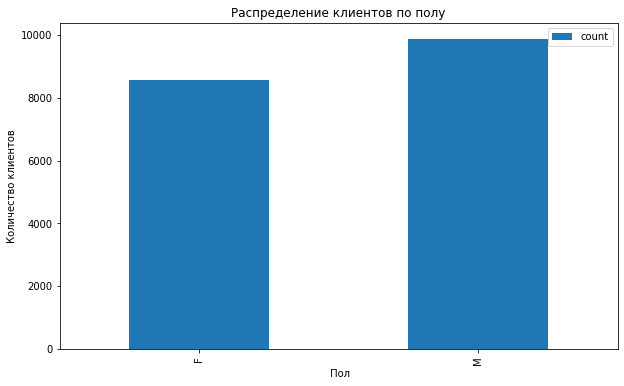

In [174]:
gender.plot(kind='bar', stacked=True, figsize=(10, 6))

# Дополнительные настройки
plt.title('Распределение клиентов по полу')
plt.xlabel(' Пол')
plt.ylabel('Количество клиентов')
plt.show()

**46,4% клиентов женского пола, 53,6% - мужского.**

Регион (анализ по тем, кто указал регион (61%) из всех звонков )

In [175]:
region = df1.groupby('region_size').agg(count=('customer_id', 'count')).sort_values(by='count') 
region['per'] = region['count'] / region['count'].sum() *100
region

,count,per
region_size,,
rural,1128,9.893001
msk,1559,13.673040
urban,2661,23.338011
town,6054,53.095948


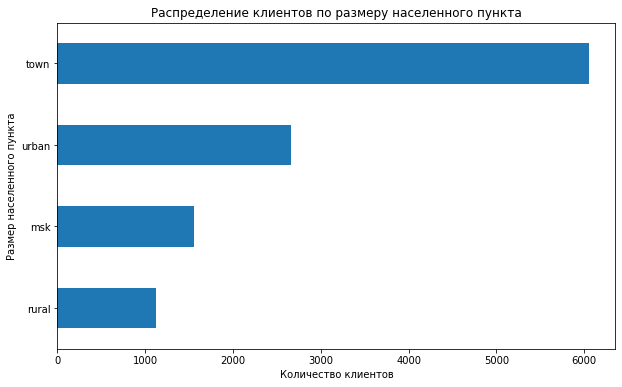

In [176]:
region['count'].plot(kind='barh', stacked=True, figsize=(10, 6))

plt.title('Распределение клиентов по размеру населенного пункта')
plt.xlabel('Количество клиентов')
plt.ylabel('Размер населенного пункта')
plt.show()

**Выводы**

По имеющимся данным region_size (заполненным),   
Аудитория Банка находится в городах - не миллионниках (53%),   
23% из городов-миллионников,  
14% из Москвы,   
10% из сельской местности.  

**Что будет дальше?**

1. Результативность. Значит ли это что на предложения банка более активно соглашаются жители обычных городов.


# 6. Данные о сотрудниках

Возраст  сотрудников

In [178]:
df.emp_age.describe()

count    18691.000000
mean        35.617944
std         13.480531
min         18.000000
25%         23.000000
50%         33.000000
75%         46.000000
max         96.000000
Name: emp_age, dtype: float64

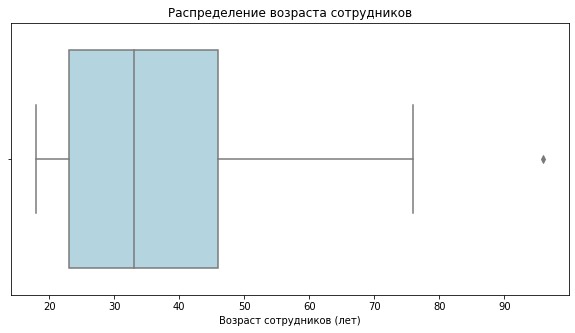

In [179]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['emp_age'], orient='h', color='lightblue')

plt.title("Распределение возраста сотрудников")
plt.xlabel("Возраст сотрудников (лет)")
plt.show()

**Выводы** 

Основная часть сотрудников в возрасте от 23 до 46 лет.Выбросы. Сотрудники, возрастом старше 60 лет   

**Что будет дальше?**

- Выбросы по возрасту – Нужно выяснить, возможно, сбой/ошибка.  > 65 лет, и даже 96 лет.  
- Связан ли опыт и возраст? Сотрудник старше 50 лет начал работать в продажах и опыт меньше года?  


### Кол-во месяцев, которые работает сотрудник


In [180]:
df.emp_work_months_cnt.describe()

count    18691.000000
mean         5.401263
std          3.483958
min          0.000000
25%          2.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: emp_work_months_cnt, dtype: float64

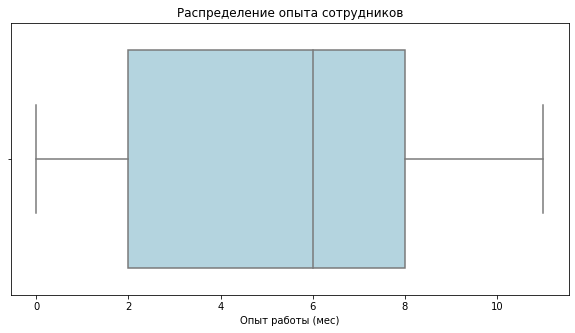

In [181]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['emp_work_months_cnt'], orient='h', color='lightblue')


plt.title("Распределение опыта сотрудников")
plt.xlabel("Опыт работы (мес)")
plt.show()

**Выводы**

Основная масса сотрудников, работает от 2 до 8 месяцев.  
Медиана - 6 мес. Максимум 11 мес.  
  
**Что будет дальше?**  

- В данных нет сотрудников, работающих от 1 года или же от 3 лет.  Поэтому будем считать за новичков и стажеров сотрудников, с опытом до 5 месяцев (на испытательном сроке).   
- Зависимость опыта от длительности диалога и результата звонка  
- Новички больше ставят статус звонка – утилизация и дозаполнение?  


##### ИТОГО: что делаем дальше
   
   1. Выбросы по длительности звонков (short/big)  Сбросы? Быстрый отказ? Oшибка или тяжелый случай?
   2. Выбросы по возрастам как среди сотрудников, так и среди клиентов.
   3. Дозаполнение заявки и утилизация. Почему они в топе: ошибка сотрудников/ системы? Новички больше ставят статус звонка – утилизация и дозаполнение? Предодобы - насколько эфективны (успех/неуспех). Нужны описания результатов звонков.
   4. Регионы. На предложения банка более активно соглашаются жители обычных городов - не миллионники (53%) из тех, у кого были указаны регионы.
   5. Опыт сотрудников. все до 1 года. Связан ли опыт и возраст? Сотрудник старше 50 лет начал работать в продажах и опыт меньше года? Более опытный сотрудник больше времени в диалоге(убеждает например)? Более опытный сотрудник больше успешных звонков? 



# гипотезы

**Гипотеза 1.** Если в скрипт продаж для Preapprove  добавим часть из скрипта для Upsell, то уменьшим долю коротких звонков и конверсия в заполнение заявки увеличится.  
т.к. Preapprove-звонки теряют 33% клиентов в первые  25 секунд — нужно адаптировать скрипты из Upsell, где short-звонков всего 9%

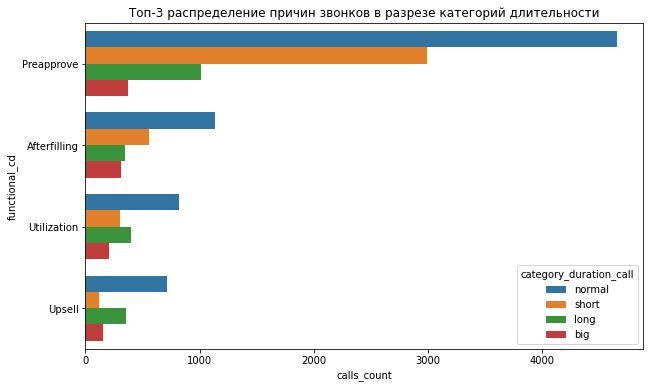

In [182]:
result = df.query('functional_cd == "Preapprove" or functional_cd == "Afterfilling" or functional_cd == "Utilization" or functional_cd == "Upsell"') \
    .groupby(['functional_cd', 'category_duration_call']) \
    .agg(calls_count=('customer_id', 'count')) \
    .sort_values('calls_count', ascending=False) \
    .reset_index()
result['sum'] = result.groupby('functional_cd').calls_count.transform('sum')
result['per'] = ((result['calls_count']  /  result['sum']) * 100).round(0)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=result.reset_index(),
    x='calls_count',
    y='functional_cd',
    hue='category_duration_call',
    orient='h'
)
plt.title(' Топ-3 распределение причин звонков в разрезе категорий длительности ')
plt.show()

In [183]:
#результат short звонков по Preapprove
df.query('functional_cd == "Preapprove" and category_duration_call == "short"') \
  .groupby(['wo_hit_status_reason_desc']) \
  .agg(calls_count=('customer_id', 'count')).sort_values('calls_count', ascending=False).reset_index().head(5)

#все короткие звонки завершаются отказом

,wo_hit_status_reason_desc,calls_count
0,Отказ прослушать предложение,1349
1,Кредитная карта не нужна,729
2,Третье лицо,340
3,Не звонить,194
4,Кредит уже не нужен,163


**Гипотеза 2**. Если изменим в анкете форму или кол-во пунктов, которые заполняют клиенты или добавим более подробную информацию о продукте, то сократим время сотрудников на дозаполнение заявки (Afterfilling) и увеличим долю звонков на более продуктивные.

В статусе Afterfilling - дозаполнение заявки логичнее, что должны быть

In [184]:
df.query('functional_cd == "Afterfilling"')['wo_hit_status_result_desc'].value_counts()

Дозвон, Отказ      1994
Дозвон, Успешно     358
Name: wo_hit_status_result_desc, dtype: int64

In [185]:
df.query('functional_cd == "Afterfilling"')['wo_hit_status_reason_desc'].value_counts().head(5)

Другое                          386
Отказ прослушать предложение    309
Нет потребности в кредите       247
Назначена встреча               193
Устраивает свой оператор        126
Name: wo_hit_status_reason_desc, dtype: int64

**Гипотеза 3**  

Если обучим сотрудников, с опытом работы до 5 месяцев, правильно проставлять статусы в системе, то увеличится доля продуктивных звонков


Большинство новичков и стажеров (64%) ставят статус Utilization. из-за неопытности. Также в комментариях ставят одни и те же статусы по-разному ('отказ от диалога' или 'Отказ от диалога' или 'Отказ прослушать предложение')

добавим в df категорию по опыту работы

In [186]:
df['time_job'] = df['emp_work_months_cnt'].apply(lambda x: 'новичок' if x <= 2 
                                                                   else ('стажеры' if x <= 5
                                                                   else ('спецы' if x <= 8
                                                                         else 'опытные' )))

job = df.groupby('time_job').emp_work_months_cnt.count().reset_index()
job['rev'] = (job.emp_work_months_cnt / job.emp_work_months_cnt.sum() * 100).round(1)


In [187]:
df.query('functional_cd == "Utilization"')['time_job'].value_counts().head(5)

новичок    556
спецы      542
стажеры    345
опытные    274
Name: time_job, dtype: int64